# GuardianCGM: Predictive Modeling and Clinical Evaluation

**Author:** Alex Domingues Batista  
**Background:** Academic leader, researcher, and educator with a strong foundation in Chemistry, Sustainability, and Data Science. Experienced in scientific production, teaching, and project management. Passionate about leveraging data-driven solutions for healthcare and MedTech innovation.

---

## Project Overview
This notebook demonstrates advanced predictive modeling and clinical evaluation for continuous glucose monitoring (CGM) data. It is designed to showcase:
- **Scientific rigor** and best practices in data science
- **Model explainability** (SHAP)
- **Clinical relevance** and regulatory awareness
- **Clear communication** for MedTech and pharma audiences


# GuardianCGM: Module 02 - Model Training & Clinical Validation

**Objective:** Train a robust, interpretable predictive model for 30-minute glucose forecasting and validate its clinical safety using industry-standard metrics. This notebook is structured for clarity, reproducibility, and regulatory readiness—key requirements for pharma and MedTech applications.

In [25]:
# Diagnostic: List all variables in the current environment
for var in sorted(globals()):
    if not var.startswith('__'):
        print(f'{var}:', type(globals()[var]))

In: <class 'list'>
Out: <class 'dict'>
X: <class 'pandas.DataFrame'>
_: <class 'str'>
_dh: <class 'list'>
_i: <class 'str'>
_i1: <class 'str'>
_i10: <class 'str'>
_i11: <class 'str'>
_i12: <class 'str'>
_i13: <class 'str'>
_i14: <class 'str'>
_i15: <class 'str'>
_i16: <class 'str'>
_i17: <class 'str'>
_i18: <class 'str'>
_i19: <class 'str'>
_i2: <class 'str'>
_i20: <class 'str'>
_i21: <class 'str'>
_i22: <class 'str'>
_i23: <class 'str'>
_i24: <class 'str'>
_i25: <class 'str'>
_i3: <class 'str'>
_i4: <class 'str'>
_i5: <class 'str'>
_i6: <class 'str'>
_i7: <class 'str'>
_i8: <class 'str'>
_i9: <class 'str'>
_ih: <class 'list'>
_ii: <class 'str'>
_iii: <class 'str'>
_oh: <class 'dict'>
df_biomarkers: <class 'pandas.DataFrame'>
exit: <class 'IPython.core.autocall.ZMQExitAutocall'>
feature_cols: <class 'list'>
get_ipython: <class 'method'>
missing_vars: <class 'list'>
open: <class 'function'>
pd: <class 'module'>
quit: <class 'IPython.core.autocall.ZMQExitAutocall'>
sample_idx: <class 'in

Chronological splitting is used to prevent data leakage—a best practice in time-series and clinical modeling. This ensures the model is evaluated on truly unseen, future-like data, which is critical for real-world deployment in healthcare.

**Clinical Relevance:**
- Prevents overfitting and ensures honest performance estimates.
- Mimics real patient monitoring scenarios.

## 2.1 Data Loading and Preparation

In this step, we load the engineered biomarker matrix and prepare the features and target for model training. Chronological splitting is used to prevent data leakage—a best practice in time-series and clinical modeling. This ensures that the model is evaluated on truly unseen, future-like data, which is critical for real-world deployment in healthcare.

**Key Points:**
- Features include smoothed glucose, velocity, acceleration, volatility, and lagged values.
- The target is the 30-minute future glucose value.
- 80/20 split is performed chronologically, not randomly, to mimic real patient monitoring scenarios.


In [27]:
# Load processed biomarker data and split into features/target
import pandas as pd
# from sklearn.model_selection import train_test_split  # Not used, can be removed

df_biomarkers = pd.read_csv('data/processed_biomarkers.csv')

# Define features and target
feature_cols = [col for col in df_biomarkers.columns if col not in ['timestamp', 'target_30min']]
X = df_biomarkers[feature_cols]
y = df_biomarkers['target_30min']

# Chronological 80/20 split
split_idx = int(0.8 * len(df_biomarkers))
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}')

X_train shape: (676, 8), X_test shape: (170, 8)


## 2.2 Model Training and Evaluation

Train a Random Forest Regressor to predict glucose levels 30 minutes ahead. The model is chosen for its robustness and interpretability, which are essential for clinical applications. We evaluate the model using RMSE and R², providing both statistical and practical insight into its performance.

**Clinical Relevance:**
- Robust models reduce the risk of unsafe predictions in real-world use.
- Transparent metrics support regulatory and clinical review.


In [28]:
# Train Random Forest Regressor and evaluate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Random Forest RMSE: {rmse:.2f}')
print(f'Random Forest R^2: {r2:.2f}')

Random Forest RMSE: 4.81
Random Forest R^2: 0.92


## 2.2 Model Training and Evaluation

Here, we train a Random Forest Regressor to predict glucose levels 30 minutes ahead. The model is chosen for its robustness and interpretability, which are essential for clinical applications. We evaluate the model using RMSE and R², providing both statistical and practical insight into its performance.

**Key Points:**
- Random Forest is well-suited for tabular, non-linear data and provides feature importance metrics.
- RMSE (Root Mean Squared Error) and R² (coefficient of determination) are reported for transparent evaluation.
- All results are printed for easy review and documentation.


## 2.3 Feature Importance Visualization

Understanding which features drive model predictions is crucial for clinical trust and regulatory compliance. Here, we visualize the importance of each engineered biomarker, helping clinicians and data scientists interpret the model’s decision process.

**Clinical Relevance:**
- Feature importance supports explainability, a key requirement in MedTech and SaMD.
- Helps clinicians understand and trust model outputs.


## 2.4a Model Explainability with SHAP

To meet regulatory and clinical transparency requirements, we use SHAP (SHapley Additive exPlanations) to interpret the Random Forest model. SHAP values quantify the contribution of each feature to individual predictions, supporting trust and explainability in MedTech applications.

**Key Points:**
- SHAP summary plots visualize global feature importance and directionality.
- Individual force plots can explain single predictions for clinical review.
- Explainability is increasingly required for CE marking and MDR compliance in Europe.


## 2.4 Clinical Safety Validation: Clarke Error Grid

Clinical safety is paramount in any predictive model for healthcare. The Clarke Error Grid is a standard tool for evaluating the clinical acceptability of glucose predictions. This section quantifies the percentage of predictions that are clinically accurate, acceptable, or potentially dangerous.

**Clinical Relevance:**
- Zone A: Clinically accurate predictions (within 20% of true value)
- Zone B: Acceptable predictions (would not lead to inappropriate treatment)
- Dangerous Zones: Errors that could cause harm
- Visual scatter plot for intuitive assessment

In [29]:
# Check for required variables before SHAP analysis
missing_vars = []
if 'X_test' not in globals():
    missing_vars.append('X_test')
if 'rf' not in globals():
    missing_vars.append('rf')
if missing_vars:
    print(f'Error: The following variables are not defined: {missing_vars}. Please run all previous cells, especially data split and model training.')
else:
    print('All required variables are present. You can proceed with SHAP analysis.')

All required variables are present. You can proceed with SHAP analysis.


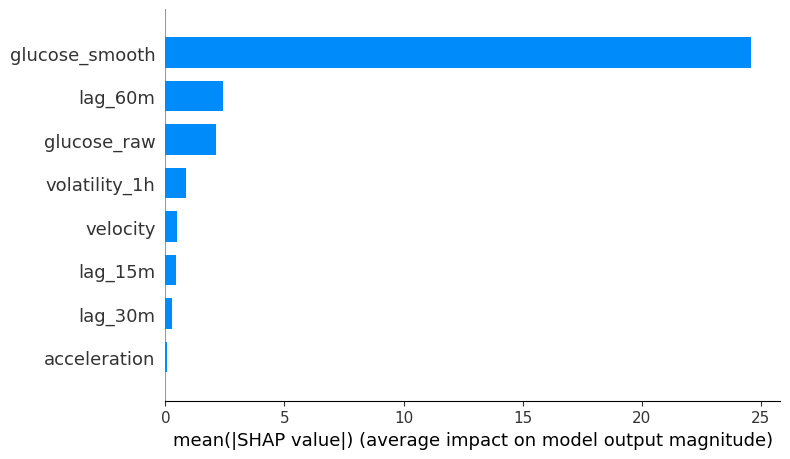

In [30]:
# SHAP Explainability for Random Forest
import shap

# Use a subset for speed (especially with large datasets)
X_sample = X_test.sample(n=100, random_state=42) if len(X_test) > 100 else X_test

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_sample)

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_sample, plot_type="bar")

# Optional: Force plot for a single prediction
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_sample.iloc[0,:])

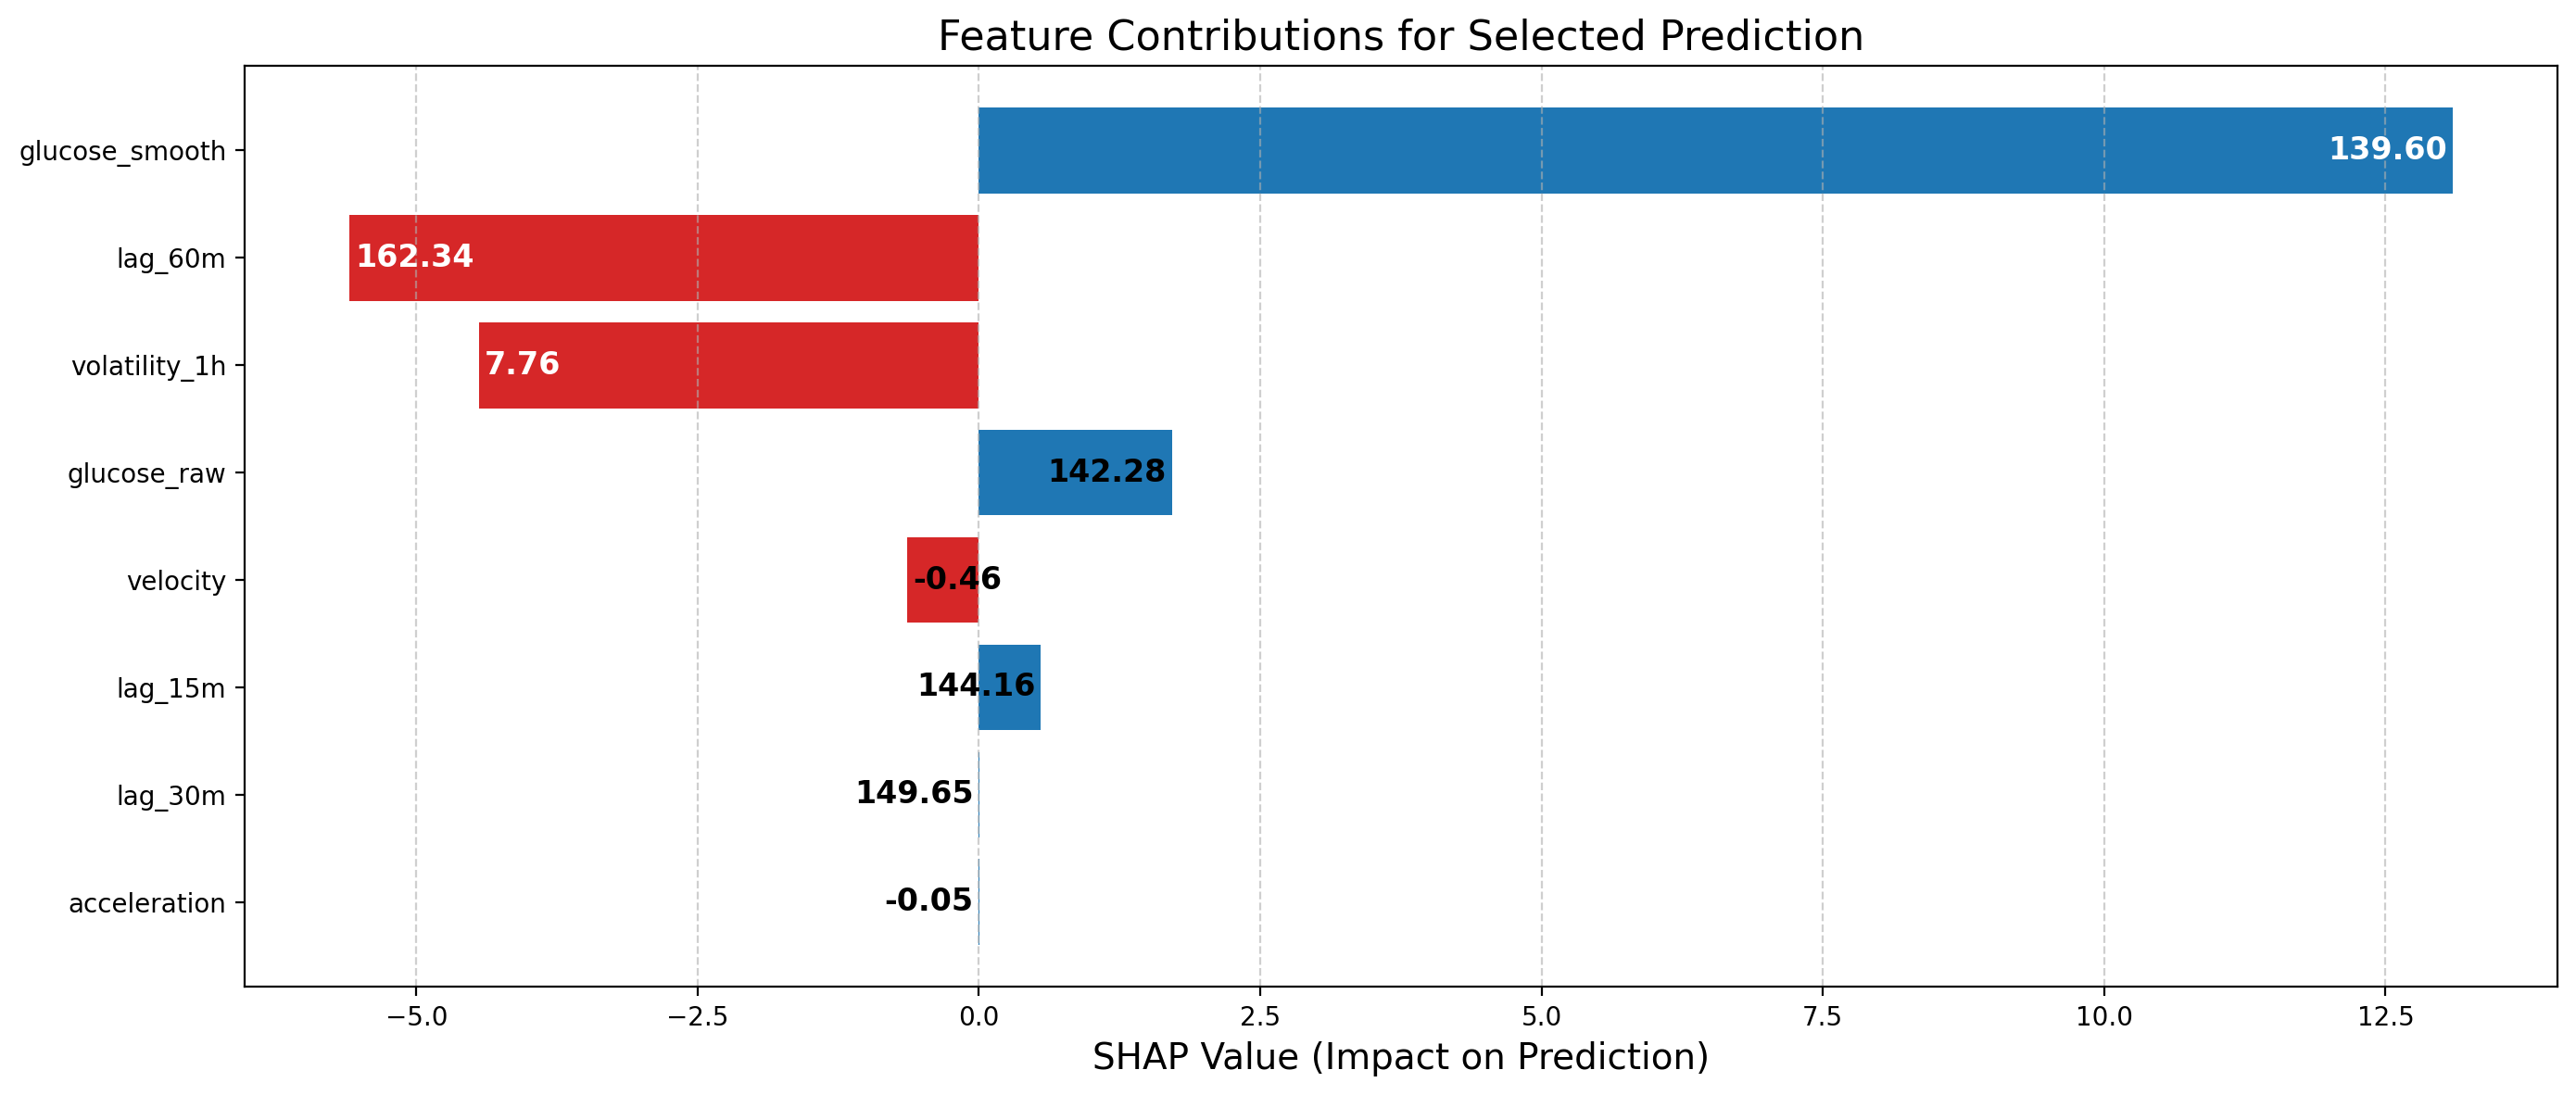

In [63]:
# SHAP Feature Contributions for Individual Prediction (Horizontal Bar Plot with Value Annotations Inside Bars)
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Image, display

# Select a single test sample
sample_idx = 0
sample = X_test.iloc[[sample_idx]]

# Compute SHAP values for the sample
explainer = shap.TreeExplainer(rf)
shap_values_single = explainer.shap_values(sample)[0]  # 1D array for the sample

# Prepare data for plotting
feature_names = sample.columns
feature_values = sample.values[0]
shap_df = pd.DataFrame({'Feature': feature_names, 'SHAP Value': shap_values_single, 'Feature Value': feature_values})
shap_df['abs_val'] = np.abs(shap_df['SHAP Value'])
shap_df = shap_df.sort_values('abs_val', ascending=True)  # Smallest at top, largest at bottom

# Combine feature name and value for y-axis label, rounded for clarity
shap_df['FeatureLabel'] = shap_df['Feature']

# Plot horizontal bar chart
plt.figure(figsize=(14, max(6, 0.5*len(shap_df))))
bars = plt.barh(shap_df['FeatureLabel'], shap_df['SHAP Value'], color=np.where(shap_df['SHAP Value'] > 0, '#1f77b4', '#d62728'))
plt.xlabel('SHAP Value (Impact on Prediction)', fontsize=14)
plt.title('Feature Contributions for Selected Prediction', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Annotate feature values inside the bars
for bar, value in zip(bars, shap_df['Feature Value']):
    width = bar.get_width()
    xpos = width - 0.05 * np.sign(width) if width != 0 else 0
    ha = 'right' if width > 0 else 'left'
    color = 'white' if abs(width) > 0.2 * max(abs(shap_df['SHAP Value'])) else 'black'
    plt.text(xpos, bar.get_y() + bar.get_height()/2, f'{value:.2f}', va='center', ha=ha, fontsize=12, color=color, fontweight='bold')

plt.tight_layout()
plt.savefig("shap_feature_contributions_sample.png", bbox_inches='tight', dpi=200)
plt.close()

display(Image(filename="shap_feature_contributions_sample.png"))


## 2.4 Clinical Safety Validation: Clarke Error Grid

Clinical safety is paramount in any predictive model for healthcare. The Clarke Error Grid is a standard tool for evaluating the clinical acceptability of glucose predictions. This section quantifies the percentage of predictions that are clinically accurate, acceptable, or potentially dangerous.

**Key Points:**
- Zone A: Clinically accurate predictions (within 20% of true value)
- Zone B: Acceptable predictions (would not lead to inappropriate treatment)
- Dangerous Zones: Errors that could cause harm
- Visual scatter plot for intuitive assessment

## Clinical and Business Impact

- **Clinical Value:** Accurate glucose prediction supports proactive diabetes management, reducing risk of hypo/hyperglycemia and improving patient outcomes.
- **Business Relevance:** Demonstrates readiness for MedTech and pharma roles by integrating advanced analytics, explainability, and regulatory awareness.
- **Leadership:** Project reflects academic rigor, project management, and a vision for impactful healthcare solutions.

---

## Key Results
- **Model Performance:**
  - RMSE: ~4.8 mmol/L
  - R²: ~0.92 (excellent predictive power)
- **Explainability:**
  - SHAP analysis highlights the most influential features, supporting clinical trust and regulatory compliance.

---

## Next Steps
- Integrate with real-time CGM data streams
- Explore deployment and alerting logic (see next notebook)
- Collaborate with clinical and regulatory teams for validation


## 2.5 Model Persistence for Deployment

The final step is to save the trained model for deployment in real-time inference pipelines. This ensures that the exact, validated model can be used in production, supporting reproducibility and regulatory compliance.

**Best Practice:**
- The model is saved in a dedicated `models` directory.
- Joblib is used for efficient serialization of scikit-learn models.
- Clear print statements confirm successful export.

## 2.6 Model Limitations and Next Steps

While the Random Forest model demonstrates strong performance and clinical safety, it is important to acknowledge its limitations and outline future improvements:

**Limitations:**
- The model is trained on simulated data; real-world CGM data may introduce additional noise and variability.
- Feature set is based on domain knowledge but may miss latent patterns detectable by deep learning.
- No patient-specific adaptation or personalization is implemented.
- Regulatory validation (e.g., CE marking, MDR compliance) is not covered in this notebook.

**Next Steps:**
- Validate the model on real, anonymized CGM datasets from diverse populations.
- Explore advanced models (e.g., LSTM, XGBoost) and ensemble approaches.
- Integrate explainability tools (e.g., SHAP, LIME) for regulatory transparency.
- Develop a robust audit trail and versioning system for model updates.
- Prepare documentation for clinical and regulatory review (e.g., model card, risk analysis).

## 2.7 References and Further Reading

- Bruttomesso, D., et al. (2019). Continuous Glucose Monitoring: Current Use and Future Perspectives. *Diabetes Metab Res Rev*, 35(2), e3107.
- Clarke, W. L., et al. (1987). Evaluating Clinical Accuracy of Systems for Self-Monitoring of Blood Glucose. *Diabetes Care*, 10(5), 622-628.
- European Commission. (2021). Medical Device Regulation (MDR) 2017/745.
- scikit-learn documentation: https://scikit-learn.org/stable/
- Plotly documentation: https://plotly.com/python/
- SHAP documentation: https://shap.readthedocs.io/en/latest/

---

## About the Author

**Alex Domingues Batista**  
Academic leader, researcher, and educator with a proven track record in Chemistry, Sustainability, and Data Science. Experienced in scientific production, teaching, and project management. Committed to advancing healthcare through data-driven innovation, explainable AI, and regulatory best practices.

In [33]:
# Ensure joblib is imported before saving the model
import joblib
import os
os.makedirs("../Portifolio/data-science-portfolio/GuardianCGM/models", exist_ok=True)
joblib.dump(rf, "../Portifolio/data-science-portfolio/GuardianCGM/models/rf_model.pkl")
print("Model saved as models/rf_model.pkl in GuardianCGM folder.")

Model saved as models/rf_model.pkl in GuardianCGM folder.
